# first import the library which we need for this project.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# now , we upload the csv file in our notebook with varible name is df.

In [2]:
df=pd.read_csv("/Users/shahbaz/Downloads/Diwali Sales Data.csv",encoding="unicode_escape")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# 1st data cleaning


Checking the data to analyze the need for cleaning areas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# check the null values .

In [4]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

here we check shape of the data.how many rows and colomn in the dataset

In [5]:
df.shape

(11251, 15)

In [6]:
df["Status"].unique() 

array([nan])

In [7]:
df["unnamed1"].unique() 

array([nan])

# now we can drop these columns


In [8]:
df.drop(["Status","unnamed1"],inplace=True,axis=1)

In [10]:
df.shape

(11251, 13)

here we drop the colomns and now shape (11251,15) to (11251,13)

In [12]:
df.dropna(inplace=True)

no null value are found in the data now data is clean

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


checking the duplicates values in the dataset.

In [116]:
df.duplicated().sum()

0

In [15]:
df.drop_duplicates(inplace=True)

    no duplicates are found 

In [16]:
df.duplicated().sum()

0

# now we apply EDA (exploratory data analysis)

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
df["Gender"].value_counts()

F    7828
M    3403
Name: Gender, dtype: int64

here, we counts the number of male and the female.

# here, we check the counts of gender in percentage help of pieplot.

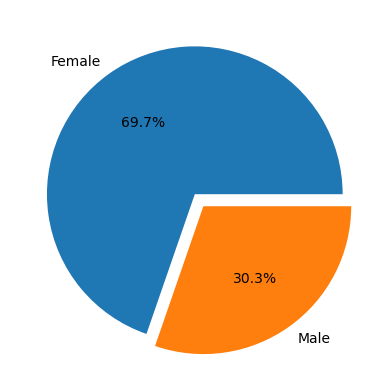

In [20]:
plt.pie(df["Gender"].value_counts(),explode=[0,0.1],labels=["Female","Male"],autopct="%1.1f%%")
plt.show()

# now checking the most purchasing across the gender 

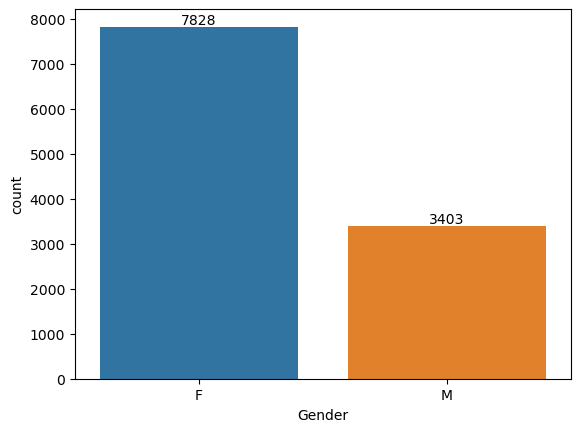

In [21]:
x=sns.countplot(x="Gender",data=df)
for i in x.containers:
    x.bar_label(i)


#female is more purchased as compare to male 

In [22]:
df.groupby(["Gender"],as_index=False)["Amount"].sum()

,Gender,Amount
0,F,74307682.43
1,M,31871146.00


#here we see the female amount is much higher than male .

In [23]:
x=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

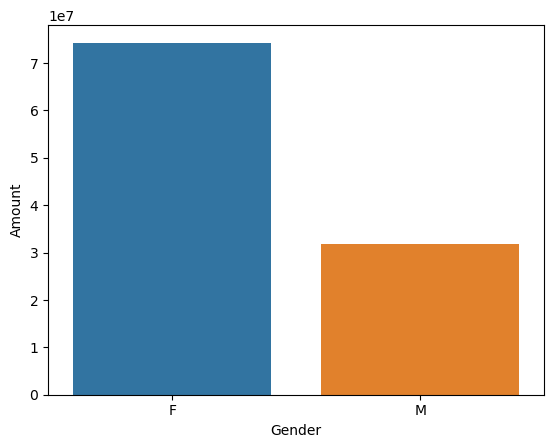

In [24]:
sns.barplot(x="Gender",y="Amount",data=x)
plt.show()


#here we see the female amount is much higher than male .

# checking the most of the buyers across the age_group

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

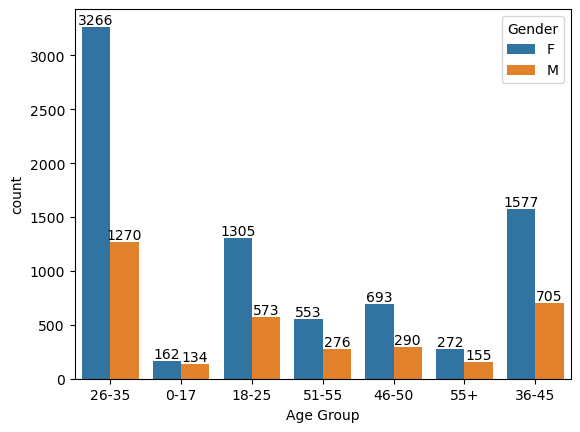

In [26]:
x=sns.countplot(data=df,x='Age Group',hue="Gender")
for i in x.containers:
    x.bar_label(i)

 here in every age group female is more purchasing than male.

In [27]:
df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

,Age Group,Amount
2,26-35,42581768.94
3,36-45,22135136.49
1,18-25,17235530.00
4,46-50,9207844.00
5,51-55,8237909.00
6,55+,4080987.00
0,0-17,2699653.00


<Axes: xlabel='Age Group', ylabel='Amount'>

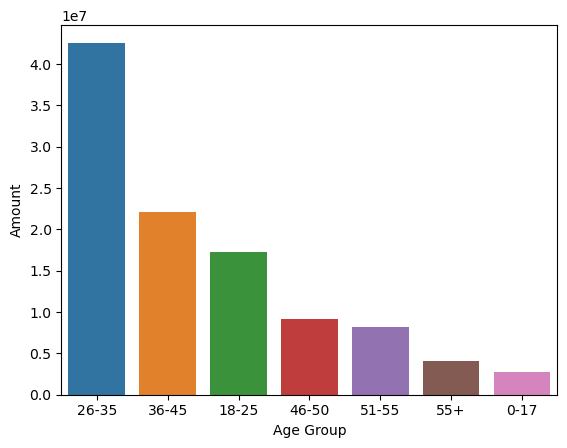

In [28]:
x=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(data=x,x="Age Group",y="Amount")

# checking the most order in which states

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [63]:
sales_state=df.groupby(['State'],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(5)

In [64]:
sales_state

,State,Orders
14,Uttar Pradesh,4803
10,Maharashtra,3798
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


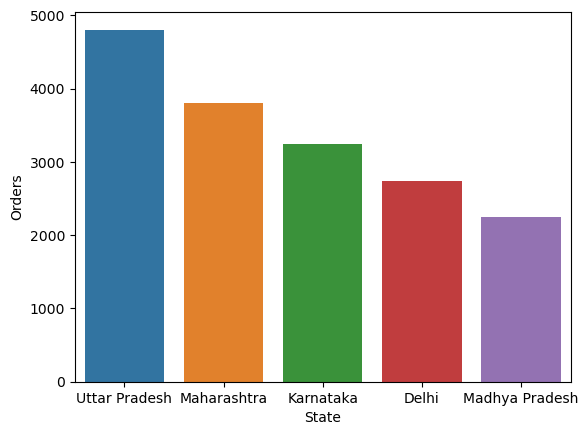

In [65]:
sns.barplot(data=sales_state,x="State",y="Orders")
plt.show()

#now  here , we take the top 5 state which have most orders 

# now here we check which state spent the most amount

In [ ]:
spent_amount=df.groupby(["State"],as_index=False)["Amount"].sum()

In [72]:
spent_amount

,State,Amount
0,Andhra Pradesh,8037146.99
1,Bihar,4014669.00
2,Delhi,11603819.45
3,Gujarat,3938159.00
4,Haryana,4217871.00
5,Himachal Pradesh,4963368.00
6,Jharkhand,3026456.00
7,Karnataka,13523540.00
8,Kerala,3894491.99
9,Madhya Pradesh,8101142.00


In [78]:
spent_amount=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(5)

In [79]:
spent_amount

,State,Amount
14,Uttar Pradesh,19346055.00
10,Maharashtra,14404467.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00


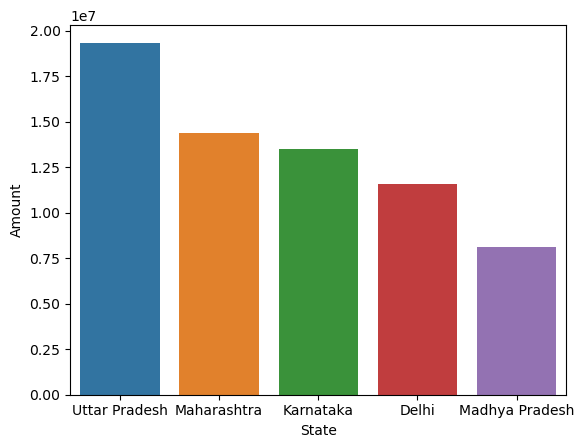

In [81]:
sns.barplot(data=spent_amount,x="State",y="Amount")
plt.show()

orders and amount are most in top 5 

# check who spent more by marital status

In [82]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [86]:
df['Marital_Status'].value_counts()

0    6514
1    4717
Name: Marital_Status, dtype: int64

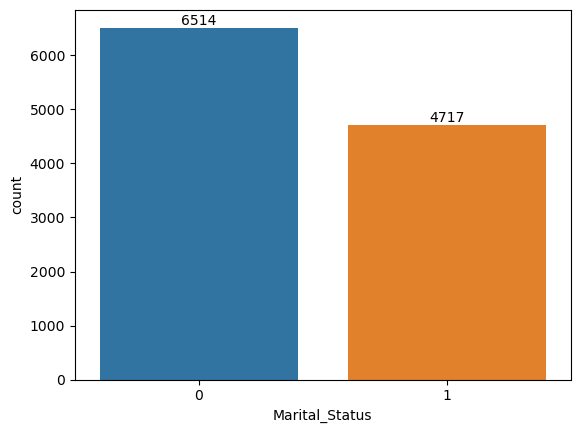

In [88]:
ax=sns.countplot(x='Marital_Status',data=df)
for bar in ax.containers:
    ax.bar_label(bar)

In [91]:
spent_gender=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

In [92]:
spent_gender

,Marital_Status,Gender,Amount
0,0,F,43778560.44
2,1,F,30529121.99
1,0,M,18320176.00
3,1,M,13550970.00


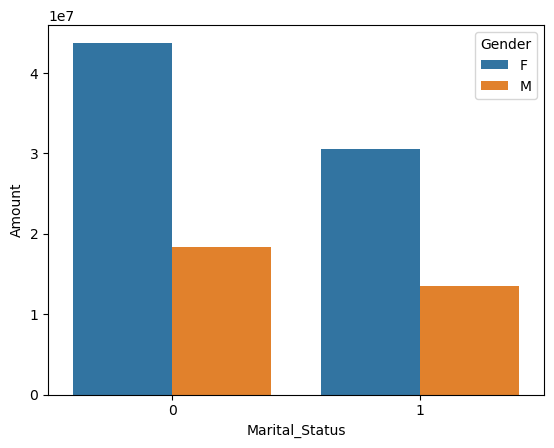

In [94]:
sns.barplot(data=spent_gender,x="Marital_Status",y="Amount",hue="Gender")
plt.show()

most of the married female are purchased then single female are purchased as compared to male.

# here we check the sector of those people who spend more 

In [95]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [96]:
df["Occupation"].value_counts()

IT Sector          1581
Healthcare         1408
Aviation           1309
Banking            1137
Govt                854
Hospitality         700
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             349
Agriculture         282
Name: Occupation, dtype: int64

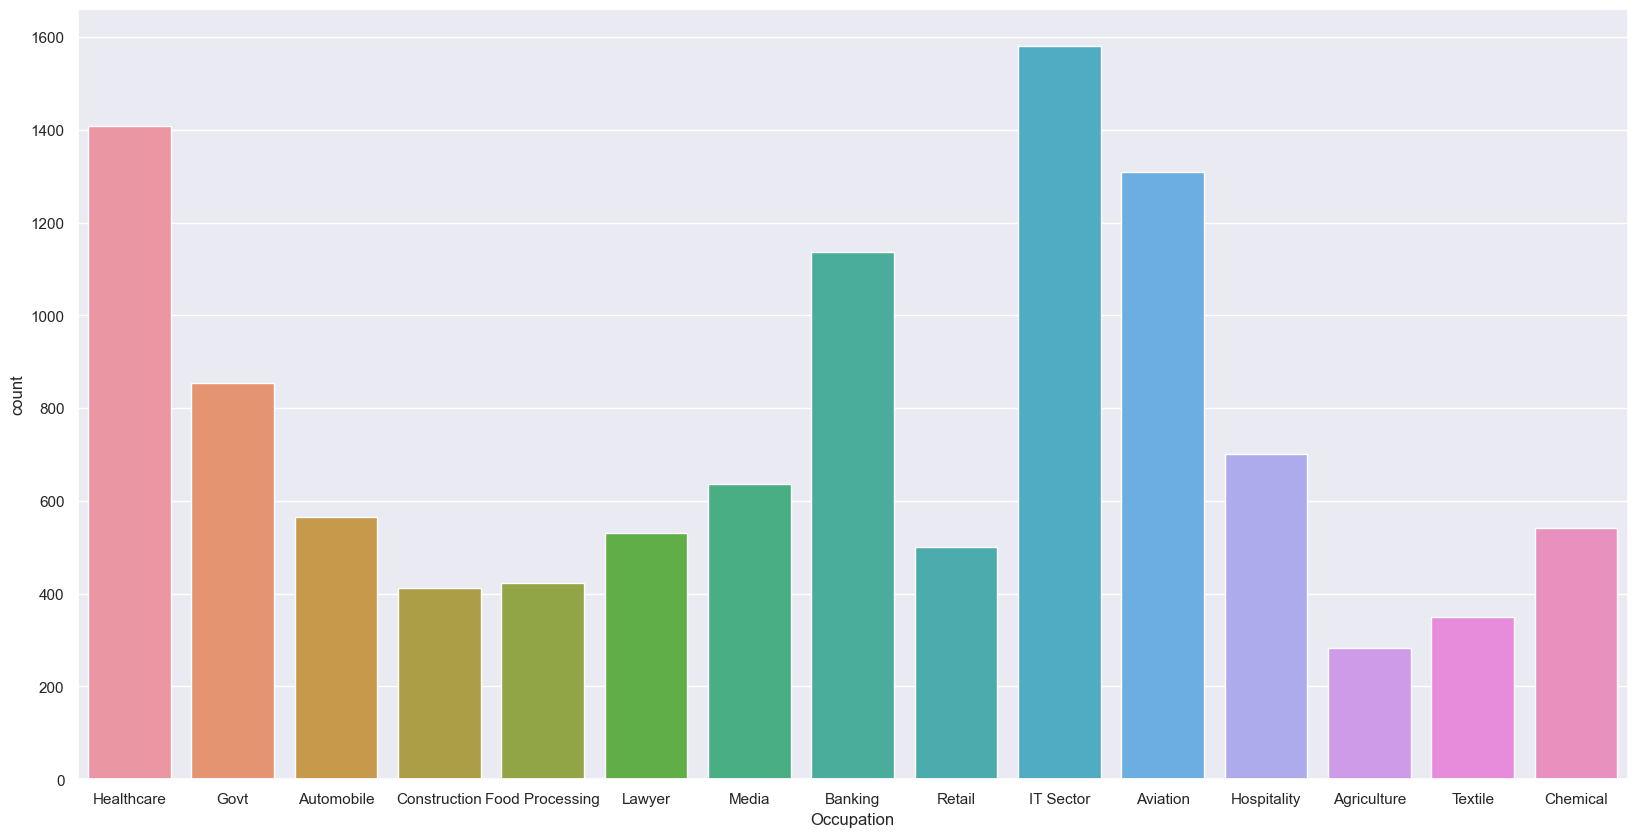

In [108]:
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.countplot(data=df,x="Occupation")
for i in ax.containers:
    ax.i_label=(i)

most of the buyers in IT sector , Healthcare , Aviation...

# check which product_category are most sell

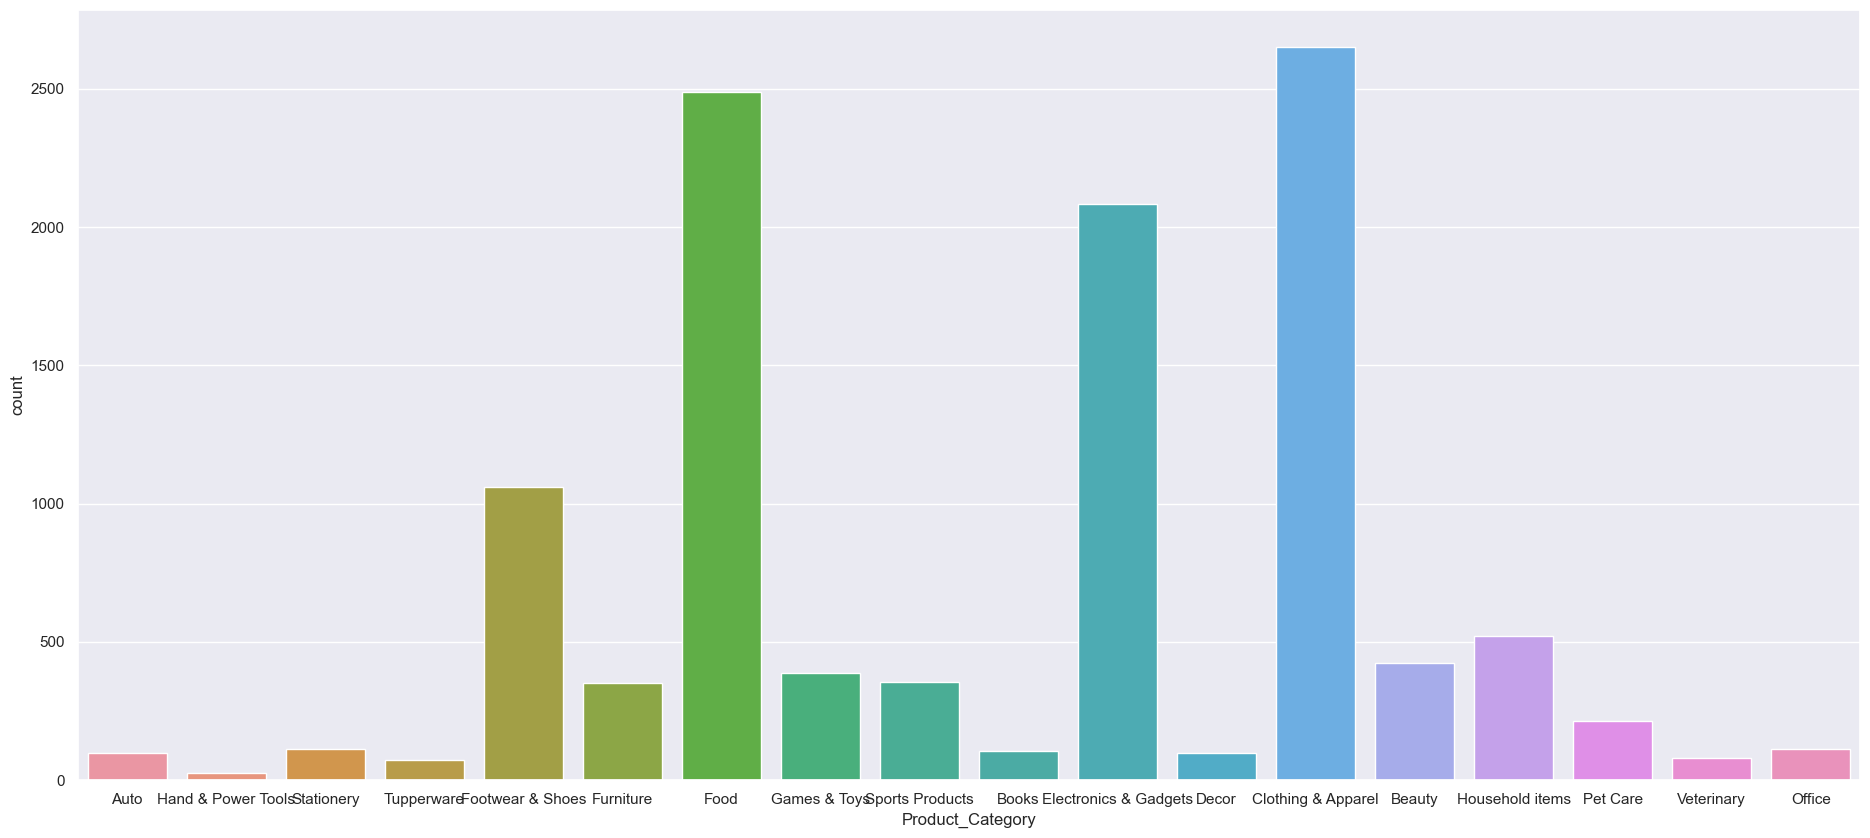

In [114]:
sns.set(rc={'figure.figsize':(23,10)})
ax=sns.countplot(data=df,x="Product_Category")
for i in ax.containers:
    ax.i_label=(i)

most sold product are clothing & apparel, food , electronics & gadgets

# conclusion

according to analyzed the data it determined that married female whose age between 26 to 25 are working in IT sector,healthcare and aviation in the states of uttarpradesh,maharashtra and karnataka are more purchased the product from cloth,food and electronic.